<a href="https://colab.research.google.com/github/AjmalSarwary/invest_ml/blob/master/limits_of_diversification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Rolling Correlation Analysis
In this notebook, I am diving into the dynamics of market correlations over time, specifically focusing on a rolling 36-month window. The analysis aims to uncover how industries move in relation to one another during different market conditions. By studying the average correlations across industries within these periods, we can gauge the robustness of diversification strategies over time and observe the impacts of market stress on asset behavior.



In [1]:
!git clone https://github.com/ajmalsarwary/invest_ml.git
%cd /content/invest_ml
import sys
sys.path.append('/content/invest_ml/code')

Cloning into 'invest_ml'...
remote: Enumerating objects: 188, done.
remote: Counting objects: 100% (188/188), done.
remote: Compressing objects: 100% (139/139), done.
remote: Total 188 (delta 55), reused 130 (delta 38), pack-reused 0
Receiving objects: 100% (188/188), 1.50 MiB | 4.45 MiB/s, done.
Resolving deltas: 100% (55/55), done.
/content/invest_ml


In [2]:
import invest_risk_kit as rk
import pandas as pd
import numpy as np

In [3]:
# Loading and view industry returns, firm numbers, and sizes for analysis.
ind_return = rk.get_ind_returns()
ind_nfirms = rk.get_ind_nfirms()
ind_size = rk.get_ind_size()

In [4]:
print(ind_return.shape)
print(ind_nfirms.shape)
ind_size.shape

(1110, 30)
(1110, 30)


(1110, 30)

In [5]:
print(ind_return.iloc[:3,:5])
print(ind_nfirms.iloc[:3,:5])
print(ind_size.iloc[:3,:5])

           Food    Beer   Smoke   Games   Books
1926-07  0.0056 -0.0519  0.0129  0.0293  0.1097
1926-08  0.0259  0.2703  0.0650  0.0055  0.1001
1926-09  0.0116  0.0402  0.0126  0.0658 -0.0099
         Food  Beer  Smoke  Games  Books
1926-07    43     3     16      7      2
1926-08    43     3     16      7      2
1926-09    43     3     16      7      2
          Food  Beer  Smoke  Games  Books
1926-07  35.98  7.12  59.72  26.41  12.02
1926-08  36.10  6.75  60.47  27.17  13.33
1926-09  37.00  8.58  64.03  27.30  14.67


In [6]:
# Calculating the market capitalization as a product of firm number and size.
# This gives us a sense of the total value within each industry.
ind_mktcap = ind_nfirms * ind_size
print(ind_mktcap.shape)
print(ind_mktcap.iloc[:3,:5])

(1110, 30)
            Food   Beer    Smoke   Games  Books
1926-07  1547.14  21.36   955.52  184.87  24.04
1926-08  1552.30  20.25   967.52  190.19  26.66
1926-09  1591.00  25.74  1024.48  191.10  29.34


1926-07    26657.94
1926-08    27436.34
1926-09    28060.41
Freq: M, dtype: float64



<Axes: title={'center': 'Joint Market Capitalization for all ind30 Industreis'}>

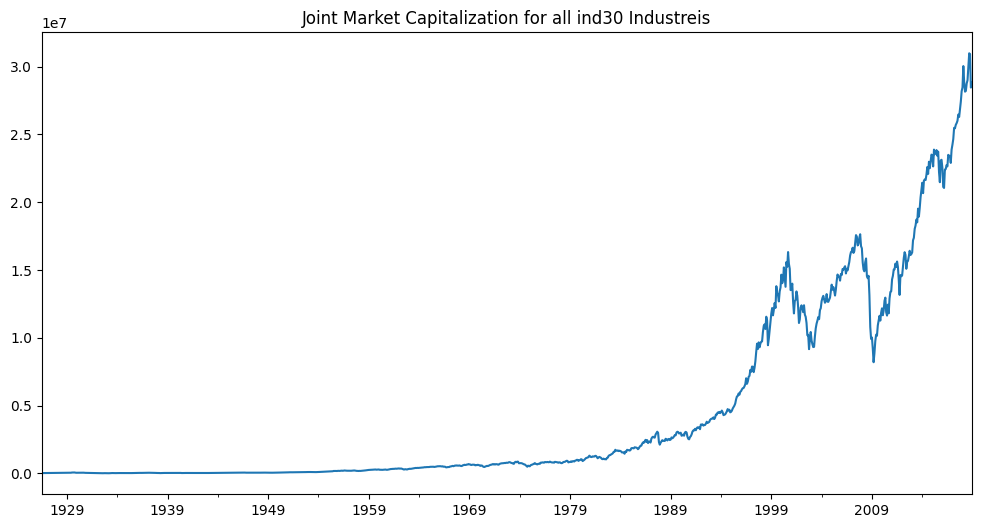

In [48]:
# Summing across the industries gives the joint market capitalization over time.
joint_mktcap = ind_mktcap.sum(axis='columns')
print(joint_mktcap.iloc[:3])
print()

# Plot the total market capitalization over time to visualize growth and major market events.
joint_mktcap.plot(figsize=(12,6), title='Joint Market Capitalization for all ind30 Industreis')


In [8]:
# % of the total_mktcap
ind_capweight = ind_mktcap.divide(joint_mktcap, axis='rows')
print(ind_capweight.iloc[:3,:5])

             Food      Beer     Smoke     Games     Books
1926-07  0.058037  0.000801  0.035844  0.006935  0.000902
1926-08  0.056578  0.000738  0.035264  0.006932  0.000972
1926-09  0.056699  0.000917  0.036510  0.006810  0.001046


In [9]:
ind_capweight.loc['1926'].sum(axis='columns')

1926-07    1.0
1926-08    1.0
1926-09    1.0
1926-10    1.0
1926-11    1.0
1926-12    1.0
Freq: M, dtype: float64

<Axes: >

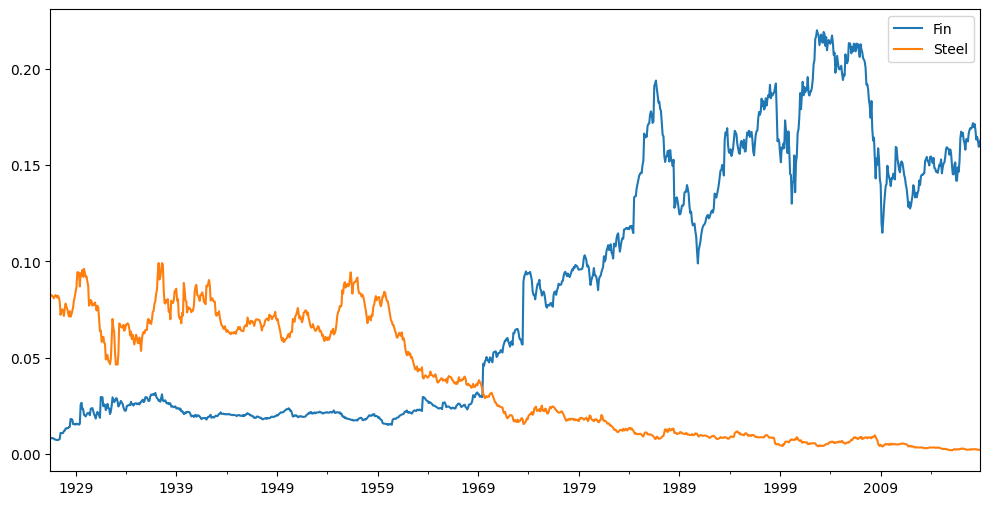

In [10]:
#sectoral shifts in the market
#displaying the capital weight of the Food and Beer industries over time
ind_capweight[["Fin","Steel"]].plot(figsize=(12,6))

<Axes: title={'center': 'Joingt CapWeighted Market Returns'}>

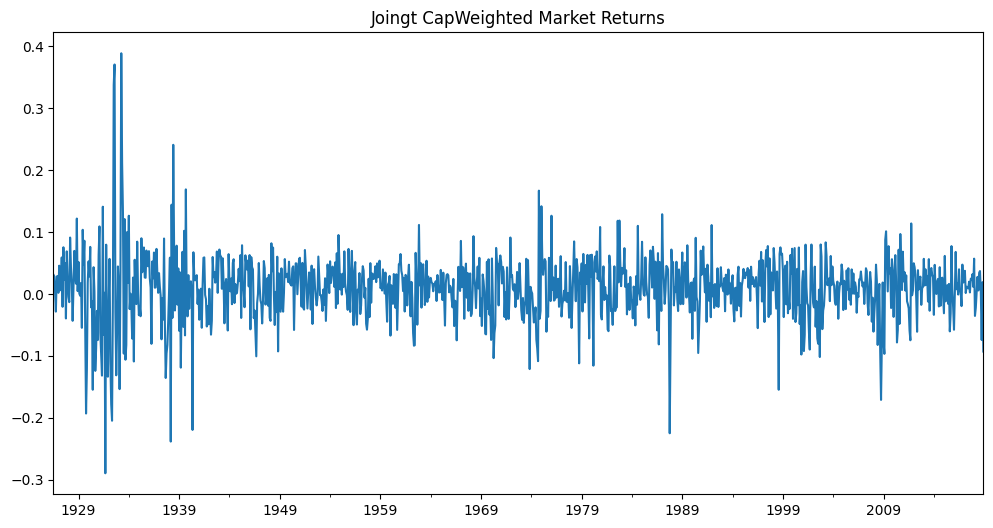

In [49]:
#gradual stabilization reflects the growing size of the market, where
#individual asset volatility has less impact on the aggregated total market return
joint_market_return = (ind_capweight*ind_return).sum(axis='columns')
joint_market_return.plot(figsize=(12,6), title='Joingt CapWeighted Market Returns')

<Axes: title={'center': 'Total Market CapWeighted Index 1926-2018'}>

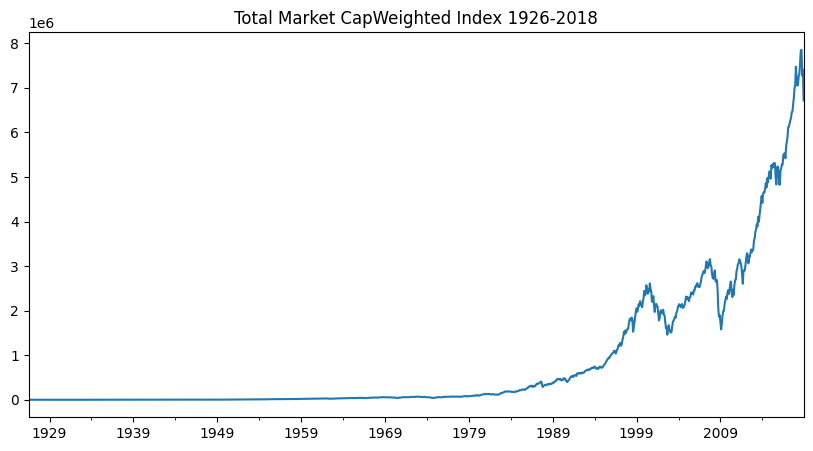

In [12]:
joint_market_index = rk.drawdown(joint_market_return).Wealth
joint_market_index.plot(figsize=(10,5), title='Total Market CapWeighted Index 1926-2018')

<Axes: >

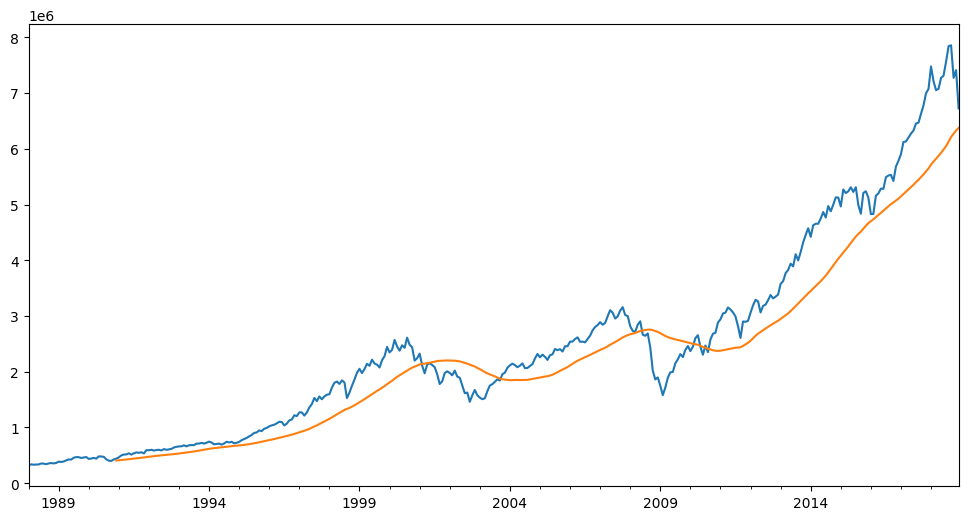

In [13]:
joint_market_index.loc['1988':].plot(figsize=(12,6))
joint_market_index.loc['1988':].rolling(window=36).mean().plot(figsize=(12,6))

<Axes: >

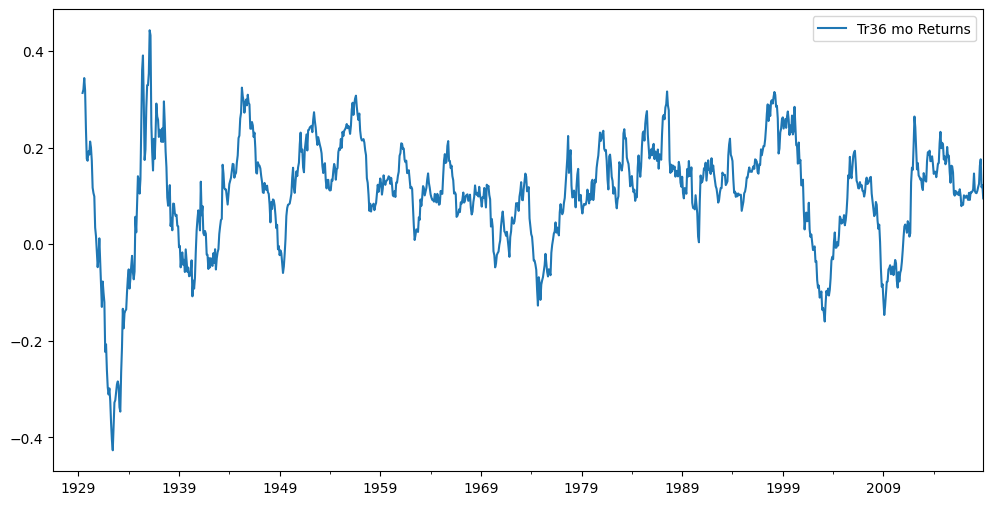

In [14]:
#joint(total) market index trailing 36 months returns
#moving towards the right of the graph, the volatility in 36-month returns appears to decrease, which
#suggests that the total market may have experienced less dramatic swings in 36-month returns in more
#recent years compared to the early part
tmi_tr36mrets = joint_market_return.rolling(window=36).aggregate(rk.annualize_rets, periods_per_year=12)
tmi_tr36mrets.plot(label='Tr36 mo Returns',figsize=(12,6), legend=True)


In [31]:
# Rolling Correlation
# time series of rolling correlations
# time series of matrices (not of numbers)
# goal is to obtain avg corr for each time period in the ts, i.e. avg of each corr matrix,
# i.e. avg industry corr in each 36m period
ts_corr = ind_return.rolling(window=36).corr()
ts_corr.index.names = ['date', 'industry']
ts_corr.tail()

Food      Beer     Smoke     Games     Books     Hshld  \
date    industry                                                               
2018-12 Whlsl     0.474948  0.356983  0.122672  0.510425  0.803362  0.419280   
        Rtail     0.517856  0.406107  0.030283  0.676464  0.636320  0.358336   
        Meals     0.370187  0.385483  0.122007  0.301516  0.520649  0.308216   
        Fin       0.298823  0.192706  0.027593  0.480276  0.694812  0.162690   
        Other     0.436952  0.376565  0.224010  0.331829  0.558072  0.390610   

                     Clths      Hlth     Chems     Txtls  ...     Telcm  \
date    industry                                          ...             
2018-12 Whlsl     0.570071  0.739764  0.785796  0.634197  ...  0.648092   
        Rtail     0.676598  0.714933  0.626034  0.634202  ...  0.562238   
        Meals     0.302176  0.416193  0.520023  0.491726  ...  0.406184   
        Fin       0.425899  0.658468  0.760151  0.577090  ...  0.420863   
        Other     0.467099  0.645035  0.712511  0.520953  ...  0.607868   

                     Servs     BusEq     Paper     Trans     Whlsl     Rtail  \
date    industry                                                               
2018-12 Whlsl     0.567395  0.543362  0.764252  0.829185  1.000000  0.744842   
        Rtail     0.762616  0.628246  0.656510  0.630615  0.744842  1.000000   
        Meals     0.444629  0.399438  0.627113  0.663358  0.643879  0.616947   
        Fin       0.585418  0.517947  0.670936  0.760730  0.746480  0.611883   
        Other     0.460322  0.434487  0.773798  0.756961  0.767652  0.619918   

                     Meals       Fin     Other  
date    industry                                
2018-12 Whlsl     0.643879  0.746480  0.767652  
        Rtail     0.616947  0.611883  0.619918  
        Meals     1.000000  0.502563  0.605226  
        Fin       0.502563  1.000000  0.734837  
        Other     0.605226  0.734837  1.000000  

[5 rows x 30 columns]

<Axes: title={'center': 'Trailing 36-Month Average Correlation Across Industries'}, xlabel='date'>

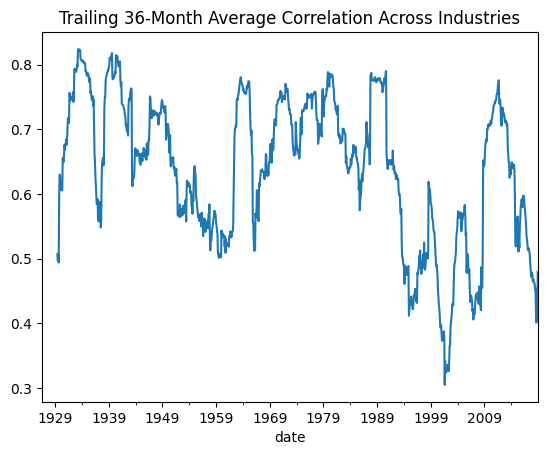

In [44]:
#Correlation Dynamics
# Grouping by date to focus on the temporal aspect of the correlation, thereby smoothing out the
# volatility and revealing longer-term trends
# hence averaging corr matrices for each time series period in a lambda function on implicit var cormat
# calling it trainling 36 corr
ind_tr36corr = ts_corr.groupby(level = 'date').apply(lambda cormat: cormat.values.mean())
# visually analyzing the changes in average correlation, which could signify periods of market
# stress or convergence among industries
ind_tr36corr.plot(title='Trailing 36-Month Average Correlation Across Industries')

<Axes: title={'center': 'Correlation of Industry Returns vs. Trends in Industry Returns'}, xlabel='date'>

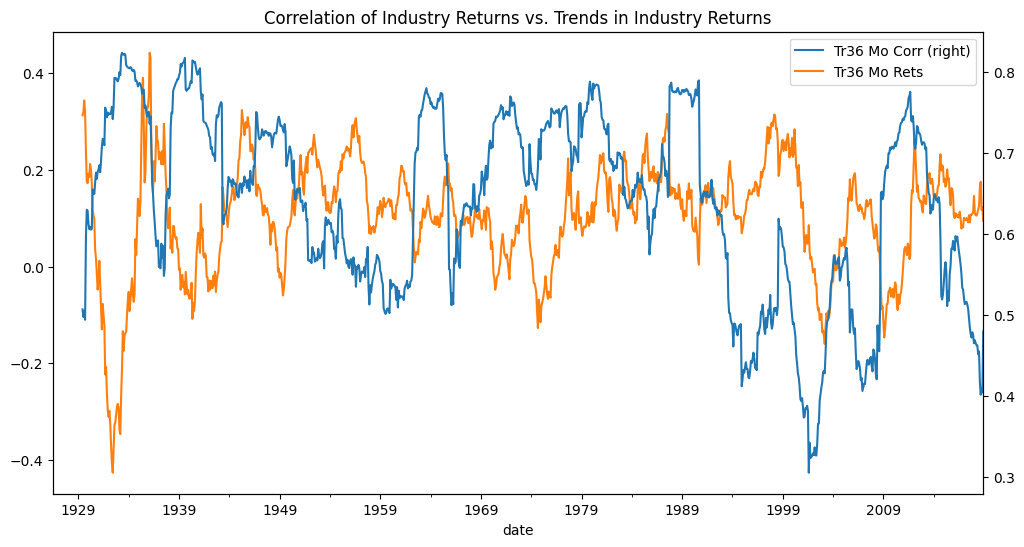

In [47]:
## Diversification Benefit:
# When correlations are low during high return periods, it may indicate a diversification benefit.
# Different investments are behaving differently, potentially spreading risk
## Risk Concentration:
# High returns accompanying low correlation might also indicate that a few assets are driving the
# portfolio's performance, which could increase risk if those assets experience a downturn
## Market Stress:
# Conversely, high correlations in periods of low returns might suggest that during
# market stress, assets are moving together, reducing the benefits of diversification

ind_tr36corr.plot(label='Tr36 Mo Corr', figsize=(12,6), legend=True, secondary_y=True)
tmi_tr36mrets.plot(label='Tr36 Mo Rets', figsize=(12,6), legend=True, title='Correlation of Industry Returns vs. Trends in Industry Returns')